In [1]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns

%matplotlib inline

In [92]:
import math

In [215]:
data=pd.read_csv("data_breast.csv") 
data.head(10)

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   
5  ...          23.75           103.40       741.6            0.1791   
6  ...          27.66           153.20      1606.0            0.1442   
7  ...          28.14           110.60       897.0            0.1654   
8  ...          30.73           106.20       739.3            0.1703   
9  ...          40.68            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  
5                  0.12440          NaN  
6                  0.08368          NaN  
7                  0.11510          NaN  
8                  0.10720          NaN  
9                  0.20750          NaN  

[10 rows x 33 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

Хорошая новость. Отсутствуют незаполненные ячейки (Кроме столбца 'Unnamed 32', мы его не будем рассматривать и все.)

In [4]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

В предлагаемом наборе цифр трудно выделить закономерность. Однако закономерности есть в названии.  
'Радиус', 'периметр' и 'площадь', наводит нас на мысль, что мы имеем дела с геометрическими параметрами (скорее всего опухоли)  
Сделаем небольшую проверочку этого утверждения

In [22]:
print('Проверим связь между радиусом и периметром, исходя из 2*Pi*R')
print('Погрешность составляет')
round(((data['radius_mean'].mean()*2*3.14-data['perimeter_mean'].mean())/data['perimeter_mean'].mean()),2)

Проверим связь между радиусом и периметром, исходя из 2*Pi*R
Погрешность составляет


-0.04

In [23]:
print('Проверим связь между радиусом и площадью, исходя из Pi*R**2')
print('Погрешность составляет')
round(((data['radius_mean'].mean()*data['radius_mean'].mean()*3.14-data['area_mean'].mean())/data['area_mean'].mean()),2)

Проверим связь между радиусом и площадью, исходя из Pi*R**2
Погрешность составляет


-0.04

Итак это геометрические параметры. Остальные названия наводят нас на мысль, что вся таблица  
такие параметры и результаты их статистической обработки.  
**Таким образом, наша задача - оценка возможности постановки диагноза по результатам внешнего осмотра пациента**

Привлечем более мощные инструменты для проверки нашего предположения о геометрических параметрах.  
'Радиус' и 'Периметр' должны укладываться на прямую проходящую через начало координат

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

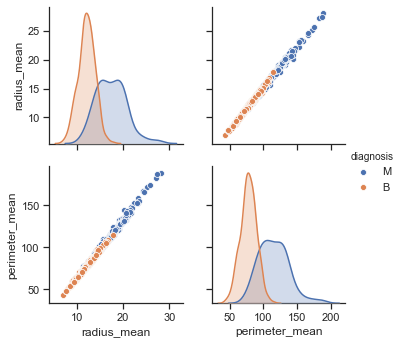

In [8]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data[['radius_mean', 'perimeter_mean', 'diagnosis']], hue='diagnosis')
plt.show()

Что и требовалось доказать

Графики получились настолько хорошими, что захотелось прогнать через них весь набор данных

Разобьем их по группам 'средние значения', 'ошибка', 'худшее значение'

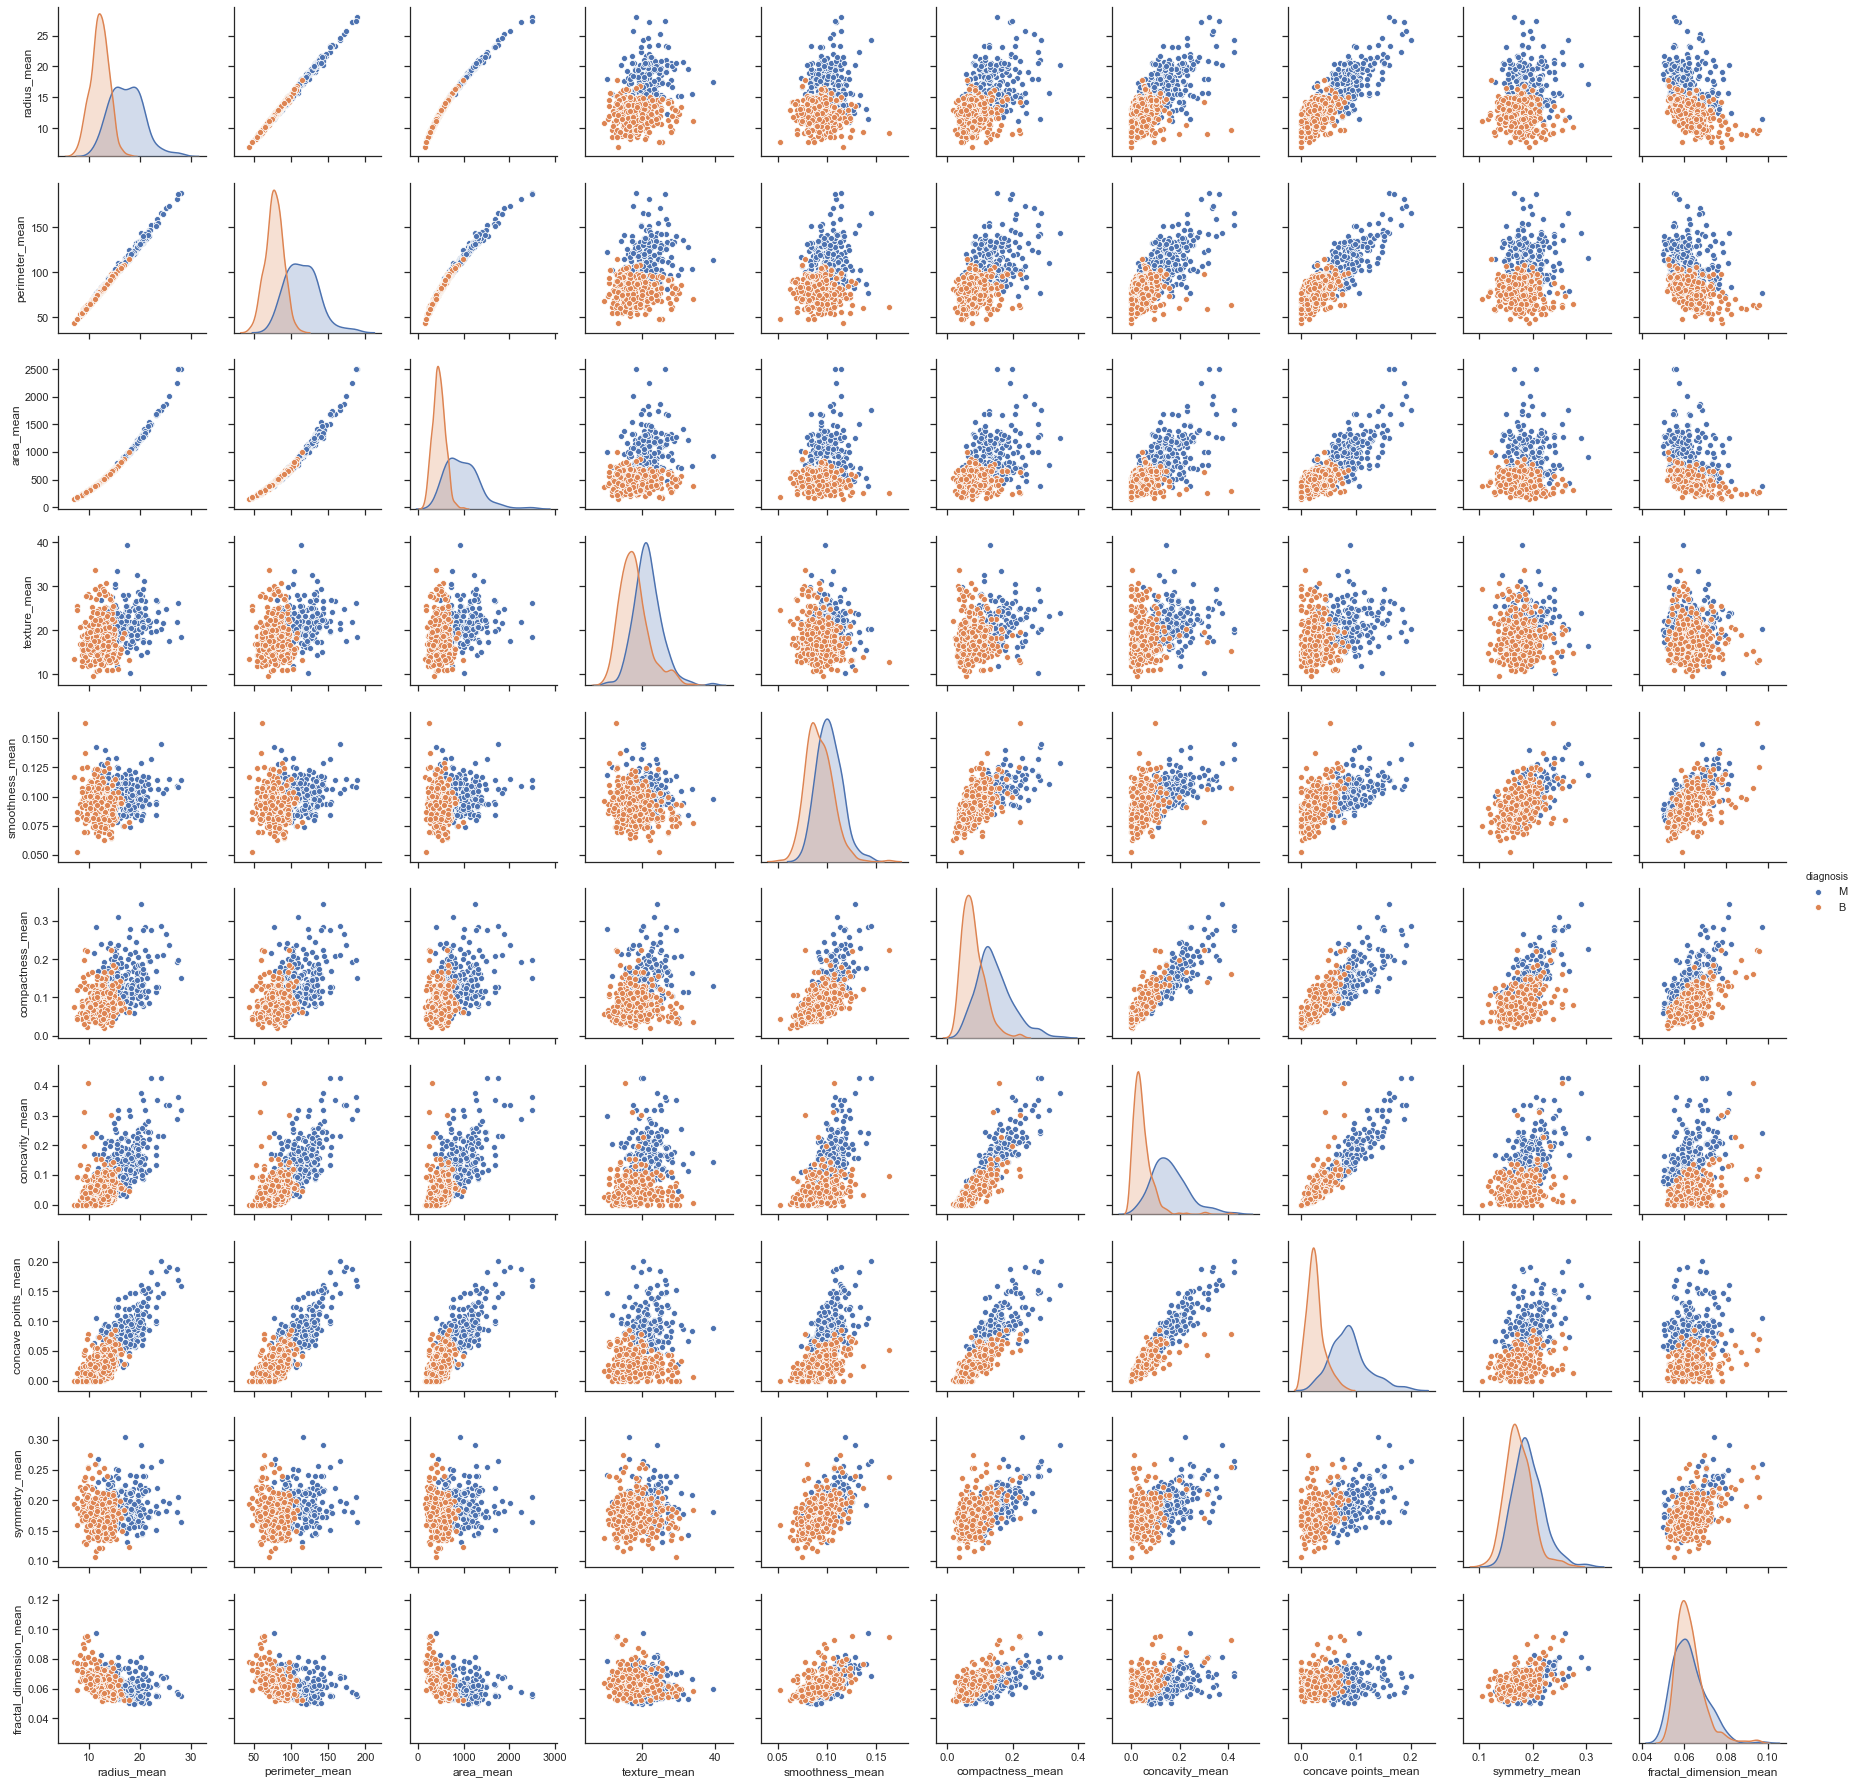

In [15]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data[['radius_mean', 'perimeter_mean', 'area_mean', 'texture_mean', 'smoothness_mean','compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'diagnosis']], hue='diagnosis')
plt.show()

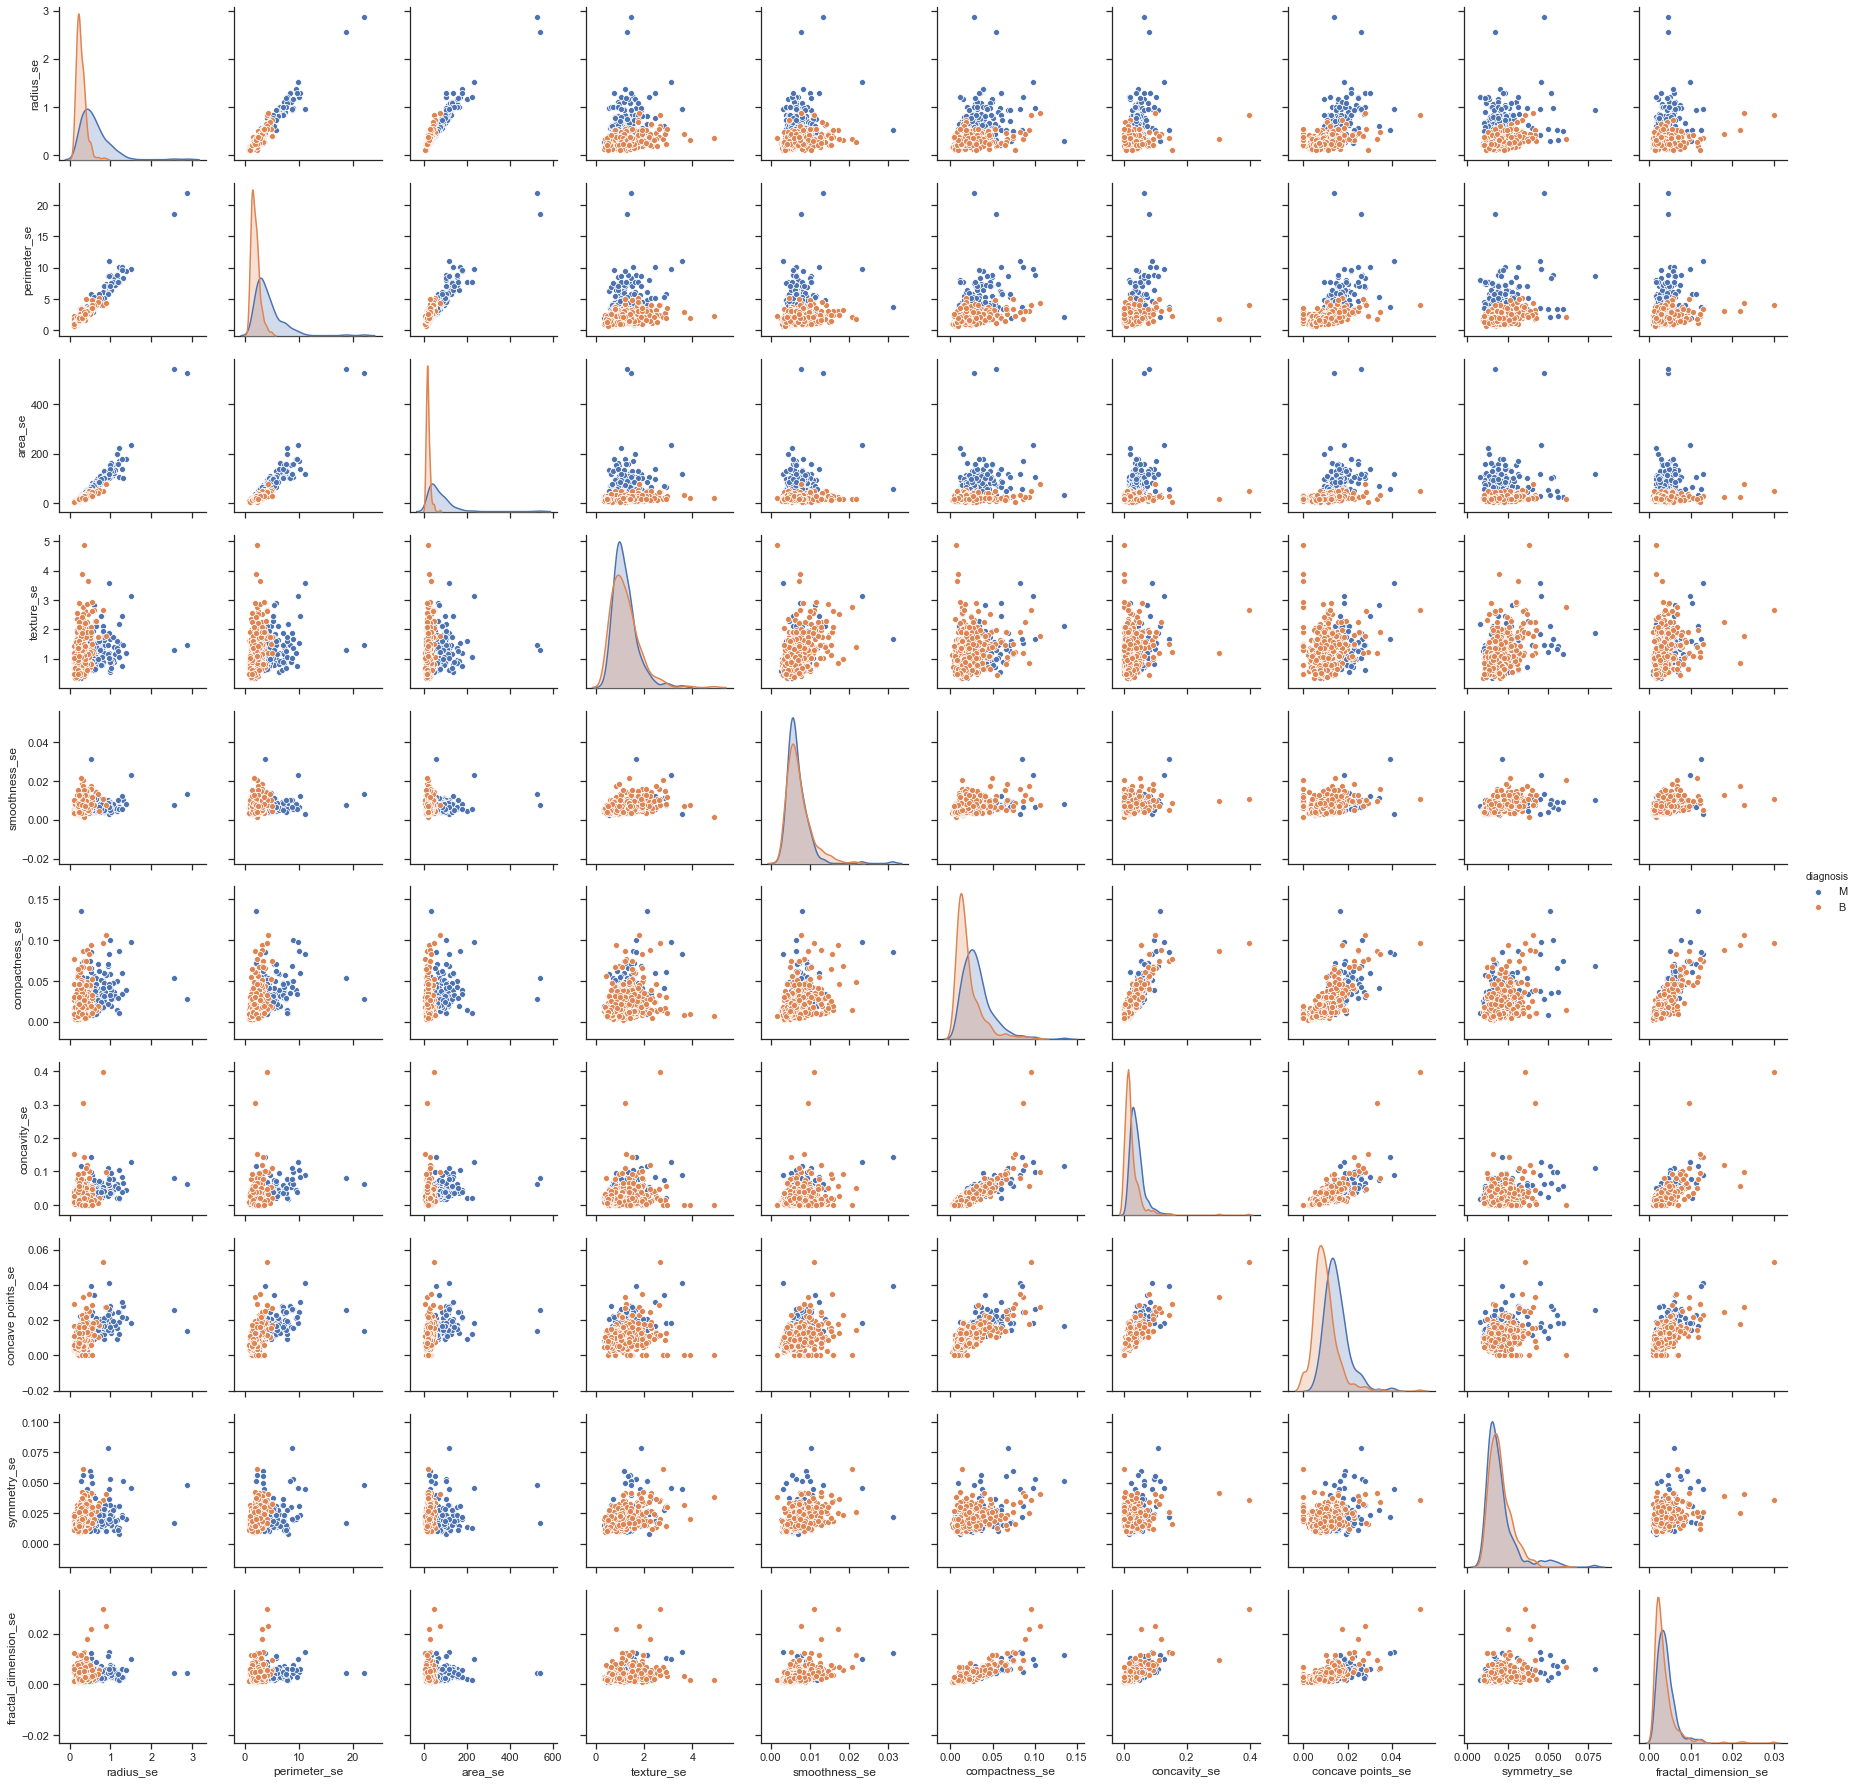

In [16]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data[['radius_se', 'perimeter_se', 'area_se', 'texture_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'diagnosis']], hue='diagnosis')
plt.show()

Несмотря на то, что на данной группе графиков мы видим хорошее разделение по классам,  
вряд ли мы будем использовать эти данные для модели. Стандартная ошибка не должна являться основным параметром для построения модели,  
если есть первичные даннные.

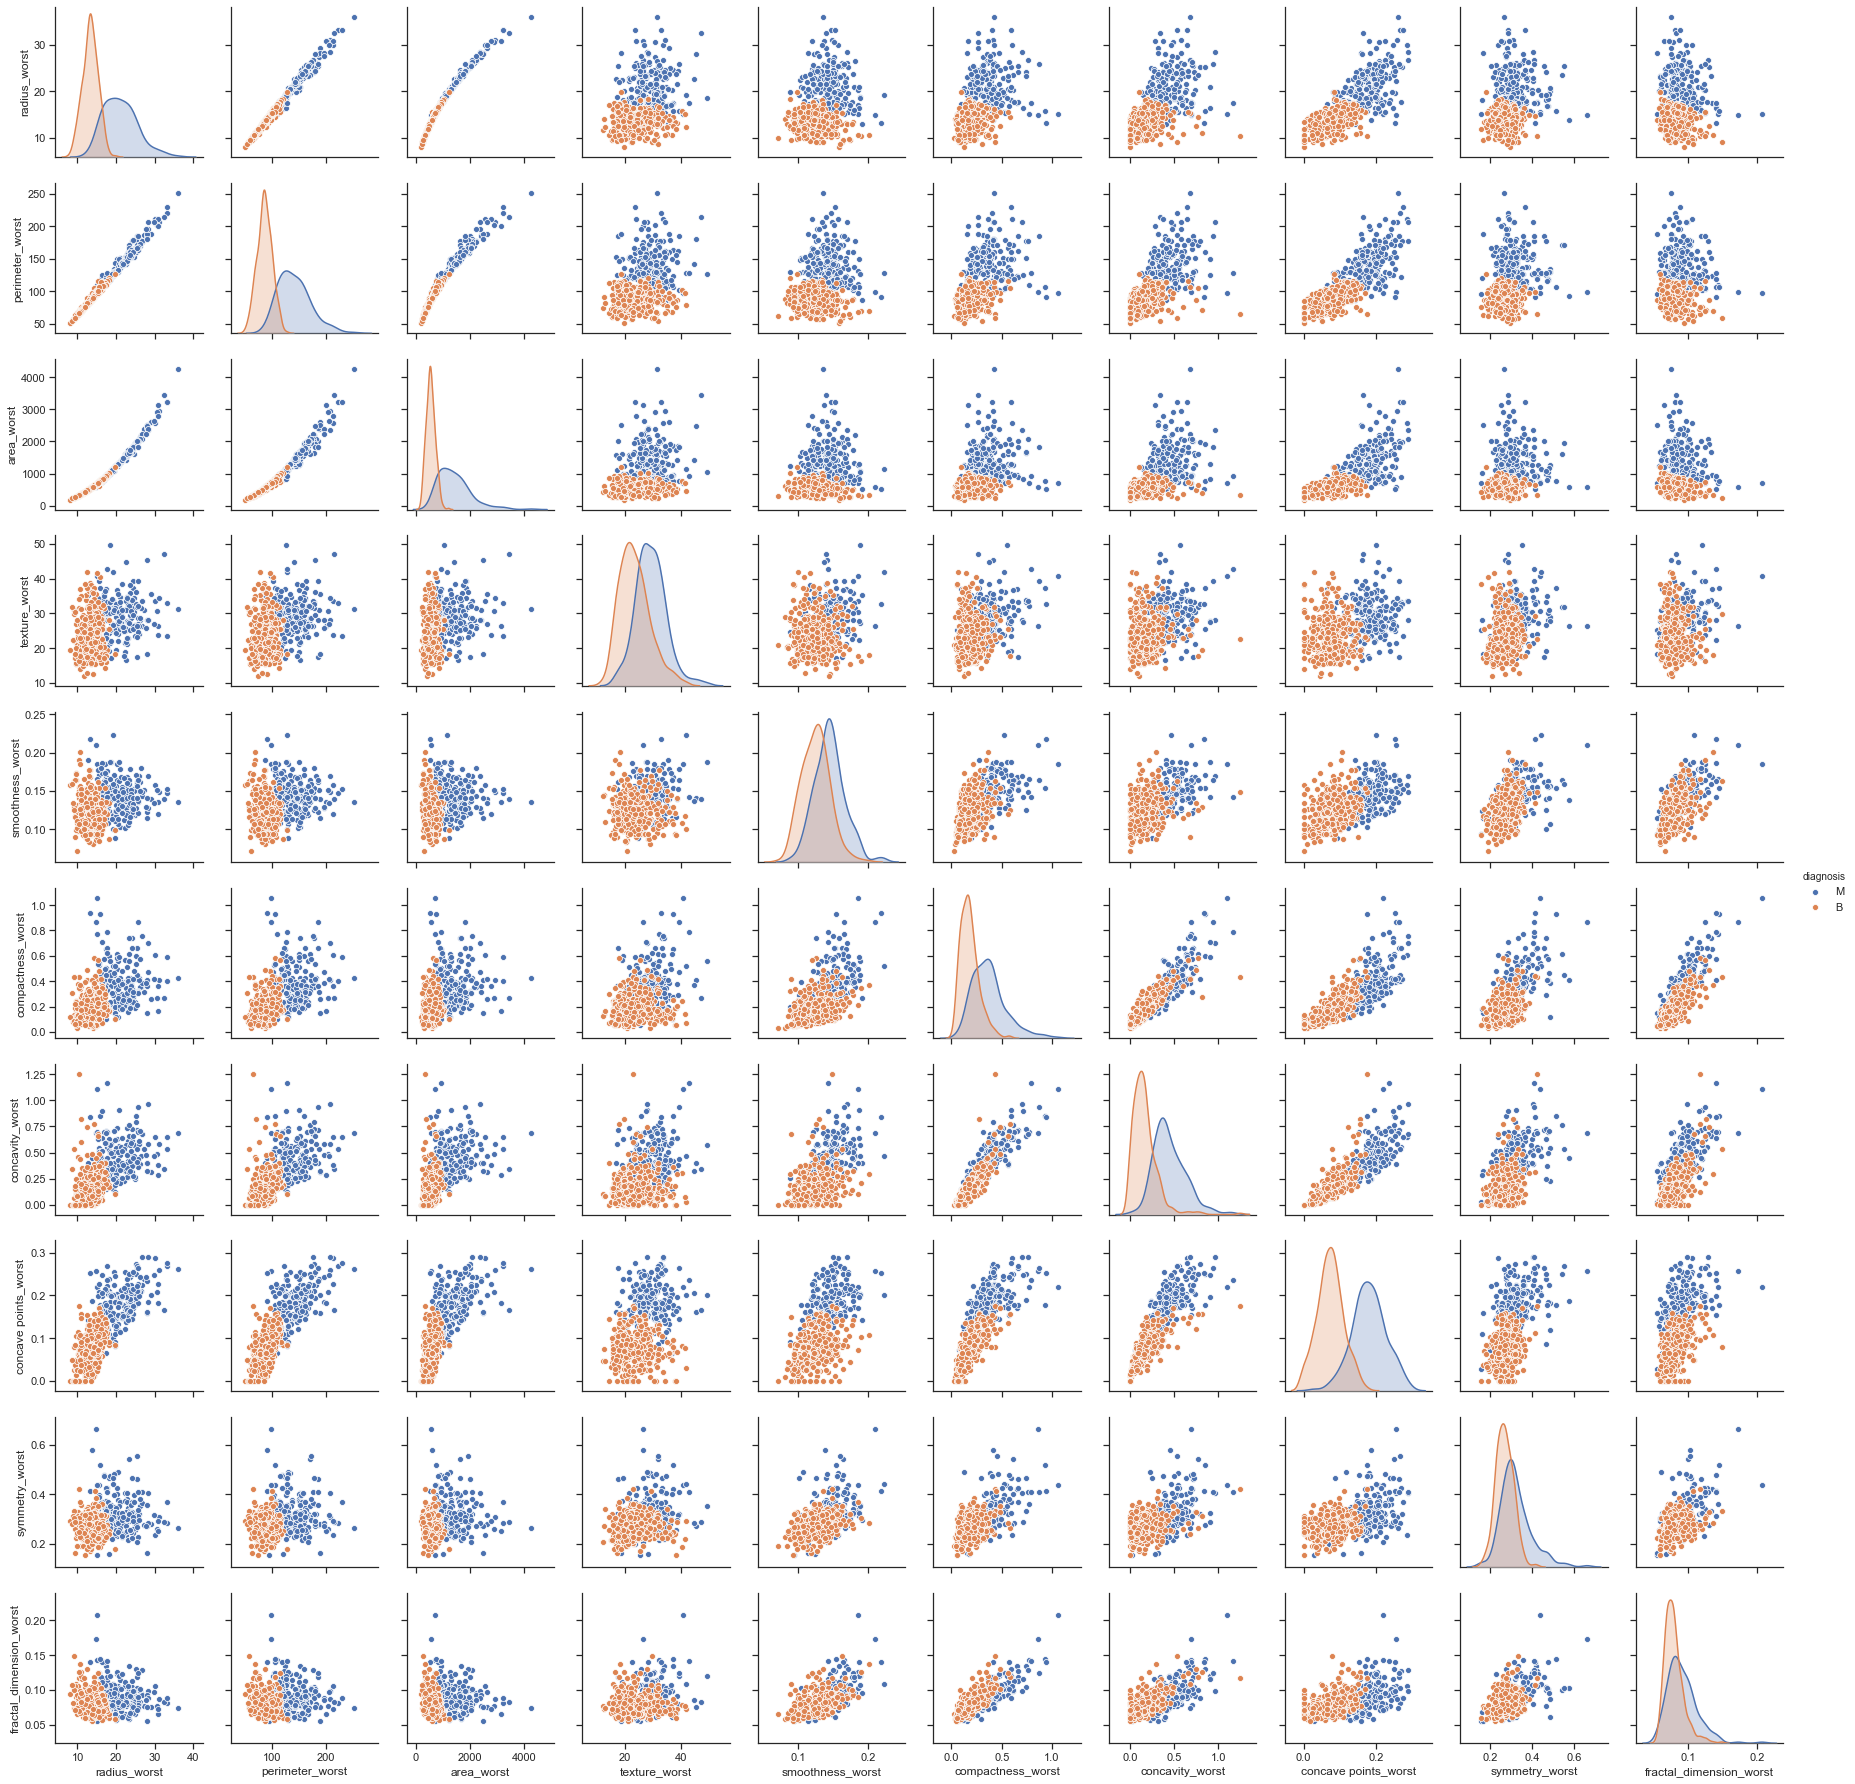

In [17]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data[['radius_worst', 'perimeter_worst', 'area_worst', 'texture_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']], hue='diagnosis')
plt.show()

Очень хороший параметр 'concave points_worst'. Прежде всего он хорош тем, что распределения 'заболевших' и 'здоровых'  
четка разделены, есть выраженные пики. Как я понимаю, это дает нам основание полагать, что мы сможем построить успешную модель.  
Есть еще хорошие признаки, но они как раз коррелируют с 'concave points_worst', т.е. их использование избыточно.  
Еще отметим для себя здесь, что график 'concave points_worst' - 'area_worst' имеет кривизну возможно, напоминающую квадратичную  
(подобно 'radius_mean' - 'area_mean'), это позволит нам cформировать новый признак

Следующий набор графиков, сделан 'для интереса'

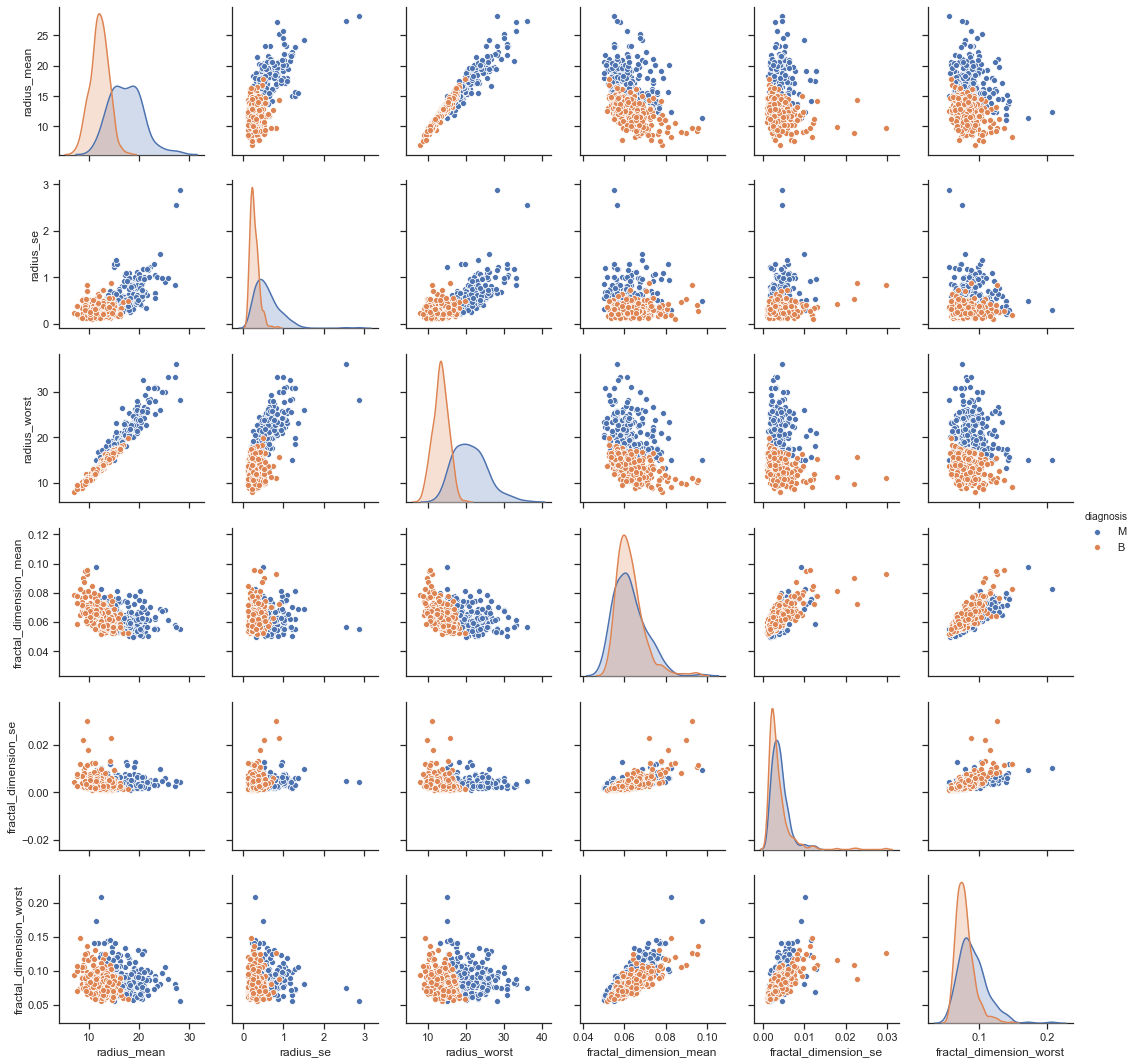

In [19]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data[['radius_mean', 'radius_se', 'radius_worst', 'fractal_dimension_mean', 'fractal_dimension_se', 'fractal_dimension_worst', 'diagnosis']], hue='diagnosis')
plt.show()

Мы еще не использовали более мощные инструменты анализа (например, не строили корреляционную матрицу),  
а у нас уже два явных фаворита среди признаков для построения модели: 'radius_mean' и 'concave points_worst'

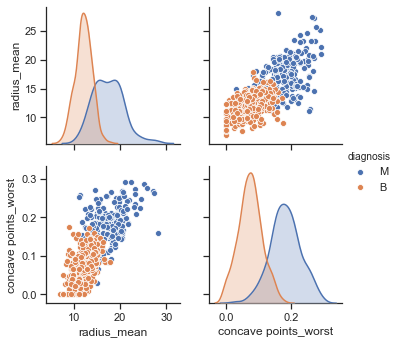

In [20]:
sns.set(style="ticks", color_codes=True)
fig = sns.pairplot(data = data[['radius_mean', 'concave points_worst', 'diagnosis']], hue='diagnosis')
plt.show()

Плохо, что наши 'победители' коррелируют, но все же проверим наше чутье

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [97]:
X = data[['radius_mean', 'concave points_worst']]
y = data['diagnosis']

In [26]:
from sklearn.model_selection import train_test_split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

In [99]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [100]:
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           B       0.85      0.98      0.91        86
           M       0.95      0.74      0.83        57

    accuracy                           0.88       143
   macro avg       0.90      0.86      0.87       143
weighted avg       0.89      0.88      0.88       143



In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
model = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=3, random_state=0).fit(X_train, y_train)
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           B       0.90      0.97      0.93        86
           M       0.94      0.84      0.89        57

    accuracy                           0.92       143
   macro avg       0.92      0.90      0.91       143
weighted avg       0.92      0.92      0.92       143



С точностью 94% мы выявляем 84% заболевших в 'деревянной' модели. Результат не плохой и не хороший, не уверен, что  
удасться получить лучший, после более глубокого анализа.

А на данном этапе мы можем попытаться улучшить результат, вспомнив, что 'concave points_worst' похож на набор  
признаков 'area'. Попробуем возвести его в степень  0.5. 

In [216]:
X = data[['radius_mean', 'concave points_worst']]
y = data['diagnosis']
X['concave_points_worst_sqrt'] = 0

In [217]:
ind = 0 
total = data['concave points_worst'].count()
print(total)
while ind < total:
    age = X.loc[ind, 'concave points_worst']
    age = math.pow(age, 0.5)
    X.loc[ind, 'concave_points_worst_sqrt'] = age
    ind += 1
X.head()   

569


radius_mean  concave points_worst  concave_points_worst_sqrt
0        17.99                0.2654                   0.515170
1        20.57                0.1860                   0.431277
2        19.69                0.2430                   0.492950
3        11.42                0.2575                   0.507445
4        20.29                0.1625                   0.403113

In [218]:
X.drop(['concave points_worst'], axis='columns', inplace=True)
X.head()

radius_mean  concave_points_worst_sqrt
0        17.99                   0.515170
1        20.57                   0.431277
2        19.69                   0.492950
3        11.42                   0.507445
4        20.29                   0.403113

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

In [221]:
model = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train)
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           B       0.93      0.97      0.95        86
           M       0.94      0.89      0.92        57

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



In [129]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           B       0.85      0.98      0.91        86
           M       0.95      0.74      0.83        57

    accuracy                           0.88       143
   macro avg       0.90      0.86      0.87       143
weighted avg       0.89      0.88      0.88       143



Результаты еще улучшились, насколько это статистически значимо не понимаю

Чтобы оценить статистическую взаимосвязь между признаками и целевой величиной  
создадим новый признак 'result' оцифровывающий 'diagnosis'

In [222]:
data['diagnosis'] = data['diagnosis'].astype('category')
data['result'] = data['diagnosis'].cat.codes
data.drop(['diagnosis'], axis='columns', inplace=True)
data.head(10)

id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   
5    843786        12.45         15.70           82.57      477.1   
6    844359        18.25         19.98          119.60     1040.0   
7  84458202        13.71         20.83           90.20      577.9   
8    844981        13.00         21.82           87.50      519.8   
9  84501001        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017   
2          0.10960           0.15990         0.19740              0.12790   
3          0.14250           0.28390         0.24140              0.10520   
4          0.10030           0.13280         0.19800              0.10430   
5          0.12780           0.17000         0.15780              0.08089   
6          0.09463           0.10900         0.11270              0.07400   
7          0.11890           0.16450         0.09366              0.05985   
8          0.12730           0.19320         0.18590              0.09353   
9          0.11860           0.23960         0.22730              0.08543   

   symmetry_mean  ...  perimeter_worst  area_worst  smoothness_worst  \
0         0.2419  ...           184.60      2019.0            0.1622   
1         0.1812  ...           158.80      1956.0            0.1238   
2         0.2069  ...           152.50      1709.0            0.1444   
3         0.2597  ...            98.87       567.7            0.2098   
4         0.1809  ...           152.20      1575.0            0.1374   
5         0.2087  ...           103.40       741.6            0.1791   
6         0.1794  ...           153.20      1606.0            0.1442   
7         0.2196  ...           110.60       897.0            0.1654   
8         0.2350  ...           106.20       739.3            0.1703   
9         0.2030  ...            97.65       711.4            0.1853   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   
5             0.5249           0.5355                0.1741          0.3985   
6             0.2576           0.3784                0.1932          0.3063   
7             0.3682           0.2678                0.1556          0.3196   
8             0.5401           0.5390                0.2060          0.4378   
9             1.0580           1.1050                0.2210          0.4366   

   fractal_dimension_worst  Unnamed: 32  result  
0                  0.11890          NaN       1  
1                  0.08902          NaN       1  
2                  0.08758          NaN       1  
3                  0.17300          NaN       1  
4                  0.07678          NaN       1  
5                  0.12440          NaN       1  
6                  0.08368          NaN       1  
7                  0.11510          NaN       1  
8                  0.10720          NaN       1  
9                  0.20750          NaN       1  

[10 rows x 33 columns]

Теперь можно смотреть корреляции. Будем это делать блоками подобно проделанному ранее. Поскольку целевая величина теперь носит дихотомический характер  
уместно будет воспользоваться корреляцией Спирмена

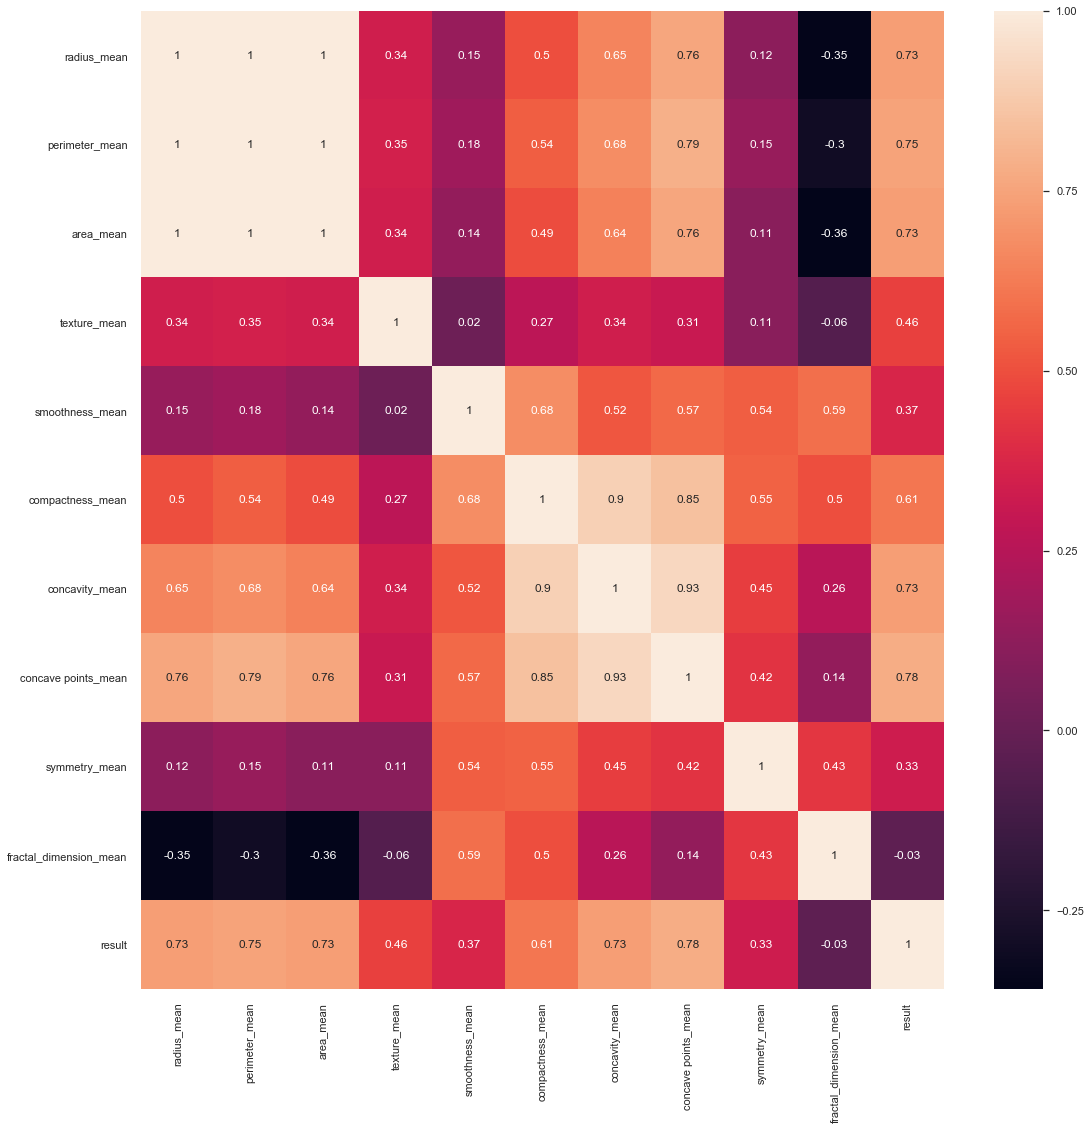

In [176]:
sns.set(rc={'figure.figsize':(18,18)})
correlation_matrix = data[['radius_mean', 'perimeter_mean', 'area_mean', 'texture_mean', 'smoothness_mean','compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'result']].corr(method ='spearman').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

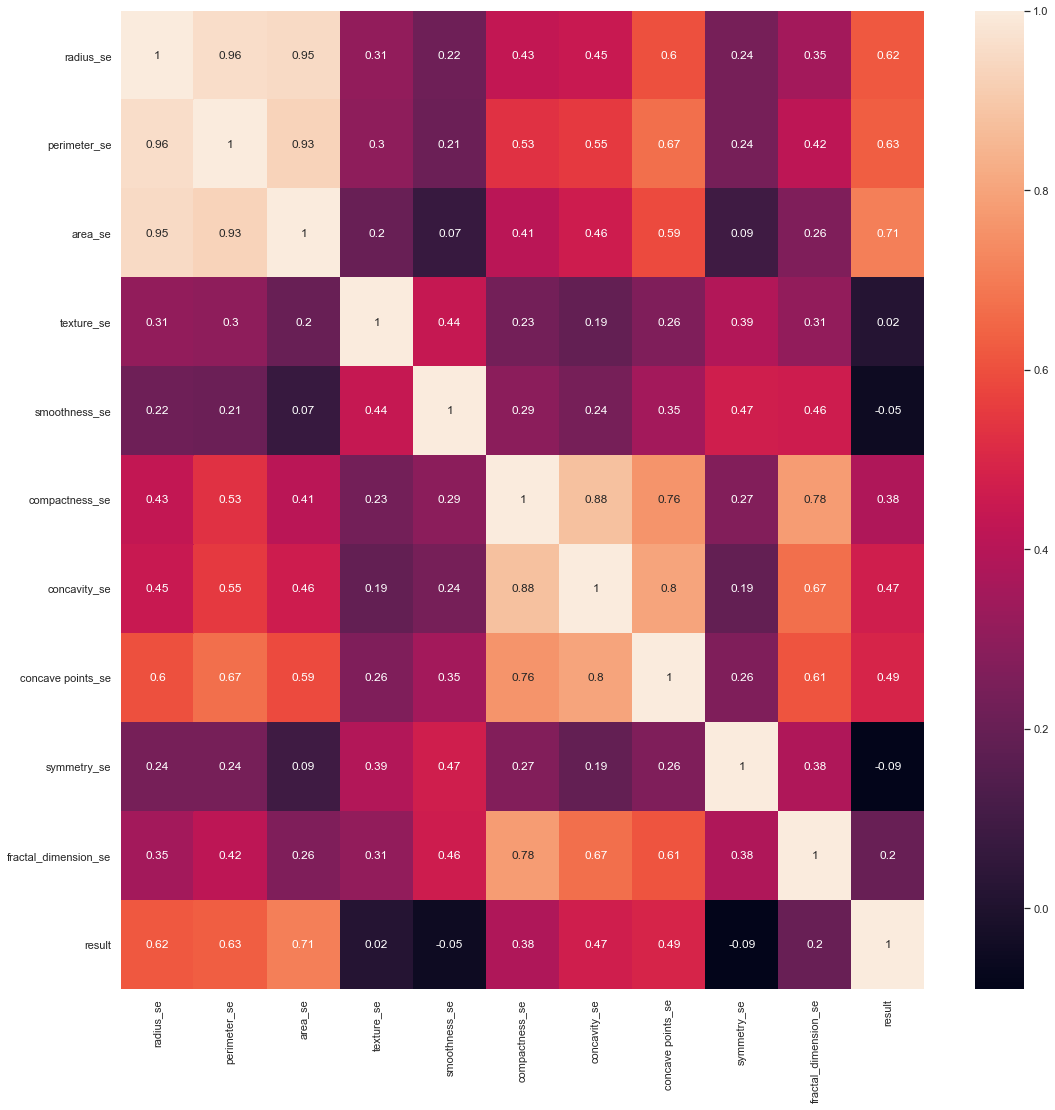

In [155]:
sns.set(rc={'figure.figsize':(18,18)})
correlation_matrix = data[['radius_se', 'perimeter_se', 'area_se', 'texture_se', 'smoothness_se','compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'result']].corr(method ='spearman').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

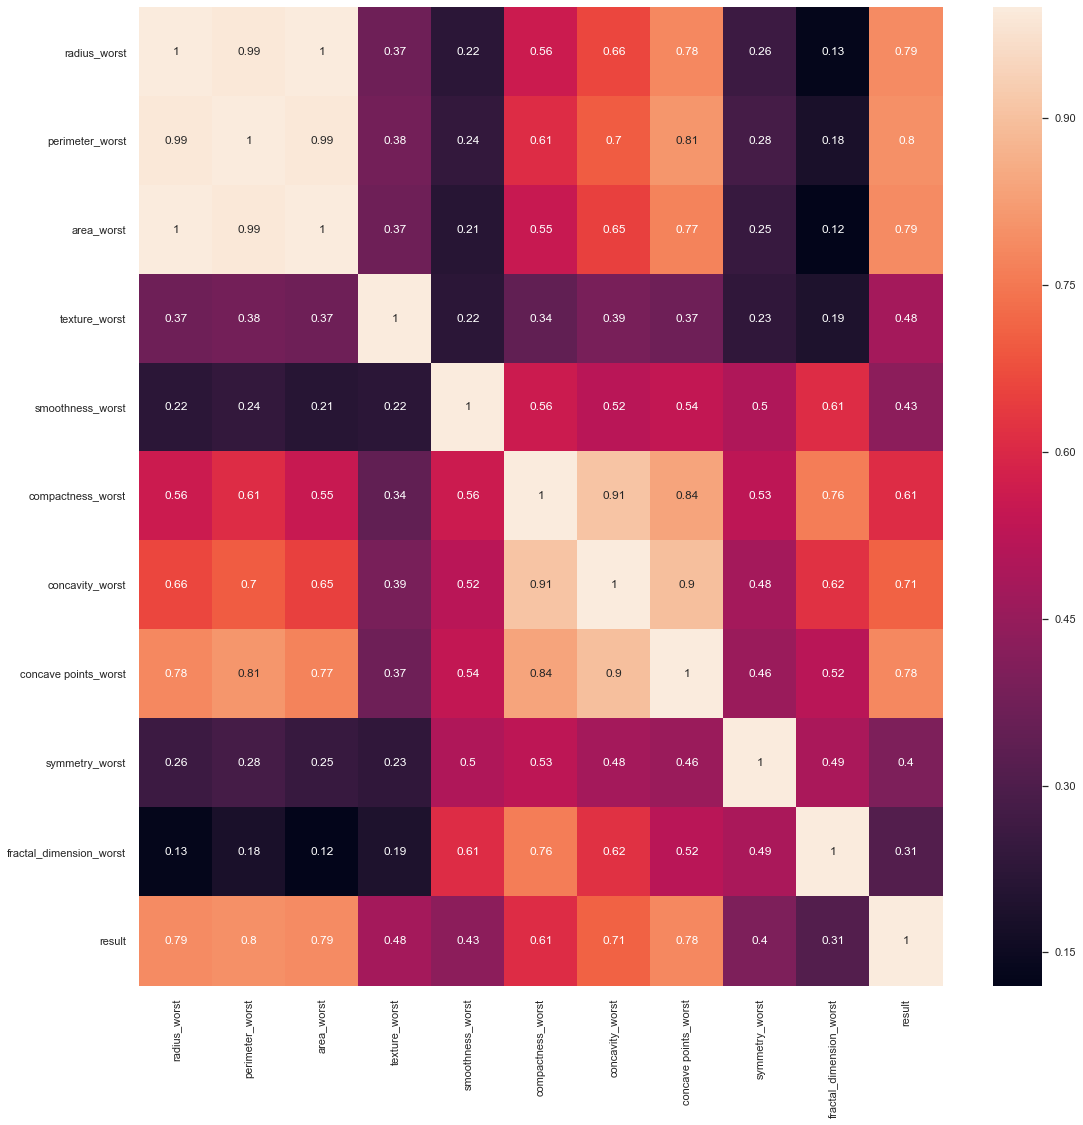

In [177]:
sns.set(rc={'figure.figsize':(18,18)})
correlation_matrix = data[['radius_worst', 'perimeter_worst', 'area_worst', 'texture_worst', 'smoothness_worst','compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'result']].corr(method ='spearman').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Ничего нового сверх того что знали мы пока не узнали. Можно выделить несколько величин, для более подробного анализа.

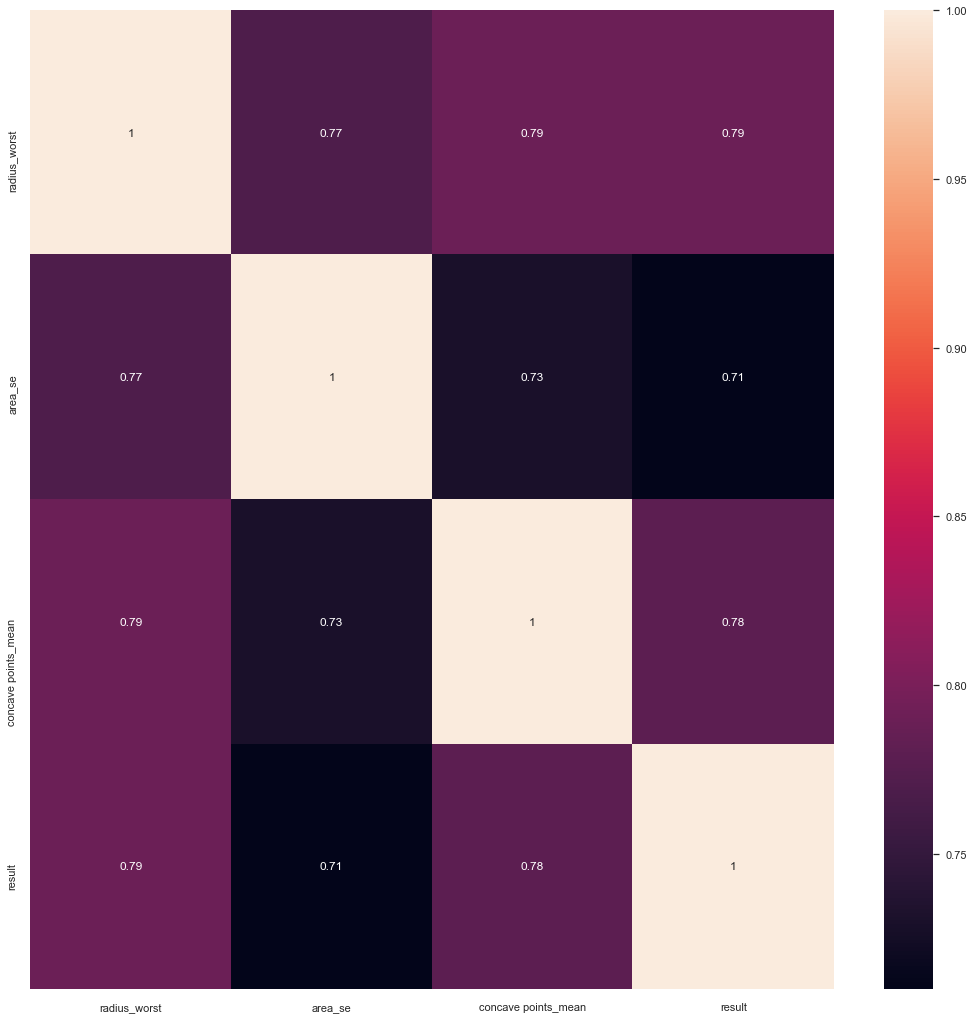

In [178]:
sns.set(rc={'figure.figsize':(18,18)})
correlation_matrix = data[['radius_worst', 'area_se', 'concave points_mean', 'result']].corr(method ='spearman').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Плохо, что все эти величины коррелируют, друг с другом. Поробуем взять квадратный корень от 'concave points_mean',  
как мы это делали ранее и посмотреть корреляцию.

In [223]:
data['concave_points_mean_sqrt'] = data['concave points_mean']**(1/2)
data[['concave_points_mean_sqrt', 'concave points_mean']].head()

concave_points_mean_sqrt  concave points_mean
0                  0.383536              0.14710
1                  0.264896              0.07017
2                  0.357631              0.12790
3                  0.324345              0.10520
4                  0.322955              0.10430

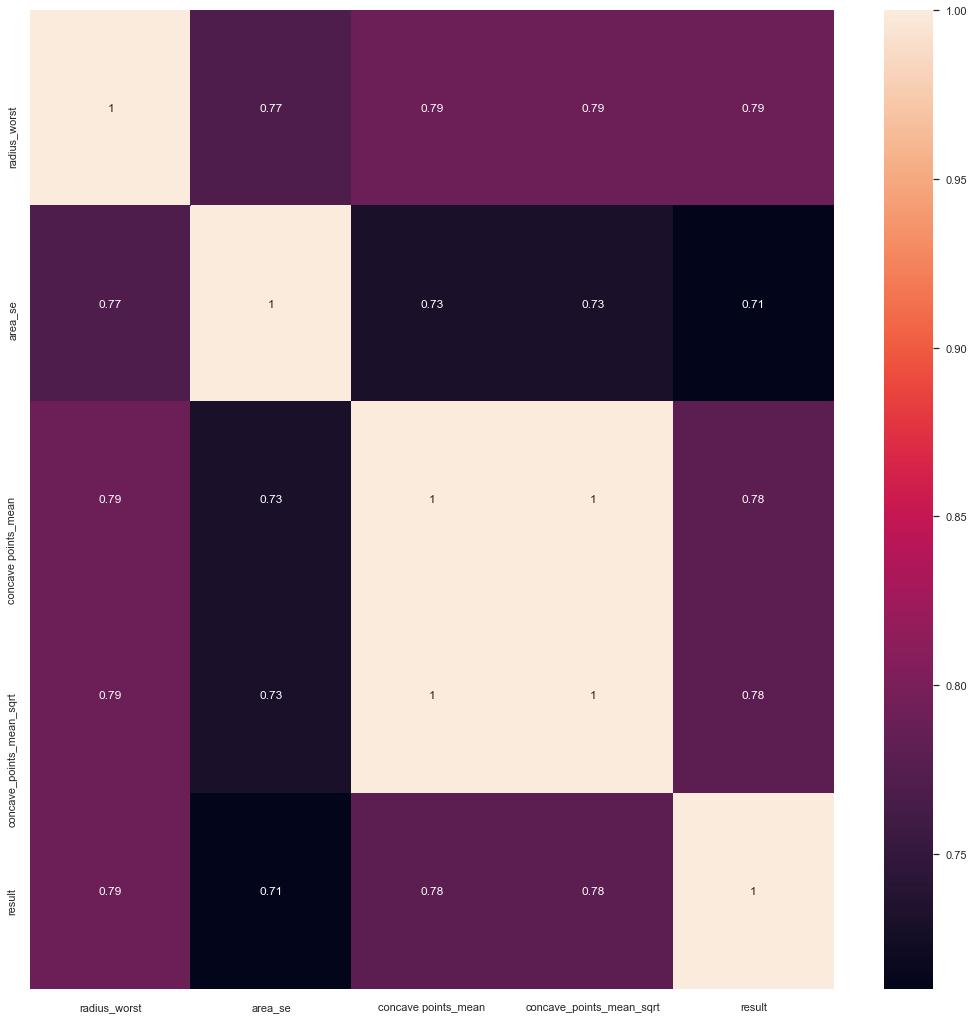

In [180]:
sns.set(rc={'figure.figsize':(18,18)})
correlation_matrix = data[['radius_worst', 'area_se', 'concave points_mean', 'concave_points_mean_sqrt', 'result']].corr(method ='spearman').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Спирмен рассматривает новую величину как равнозначную исходной. Попробуем Пирсона.

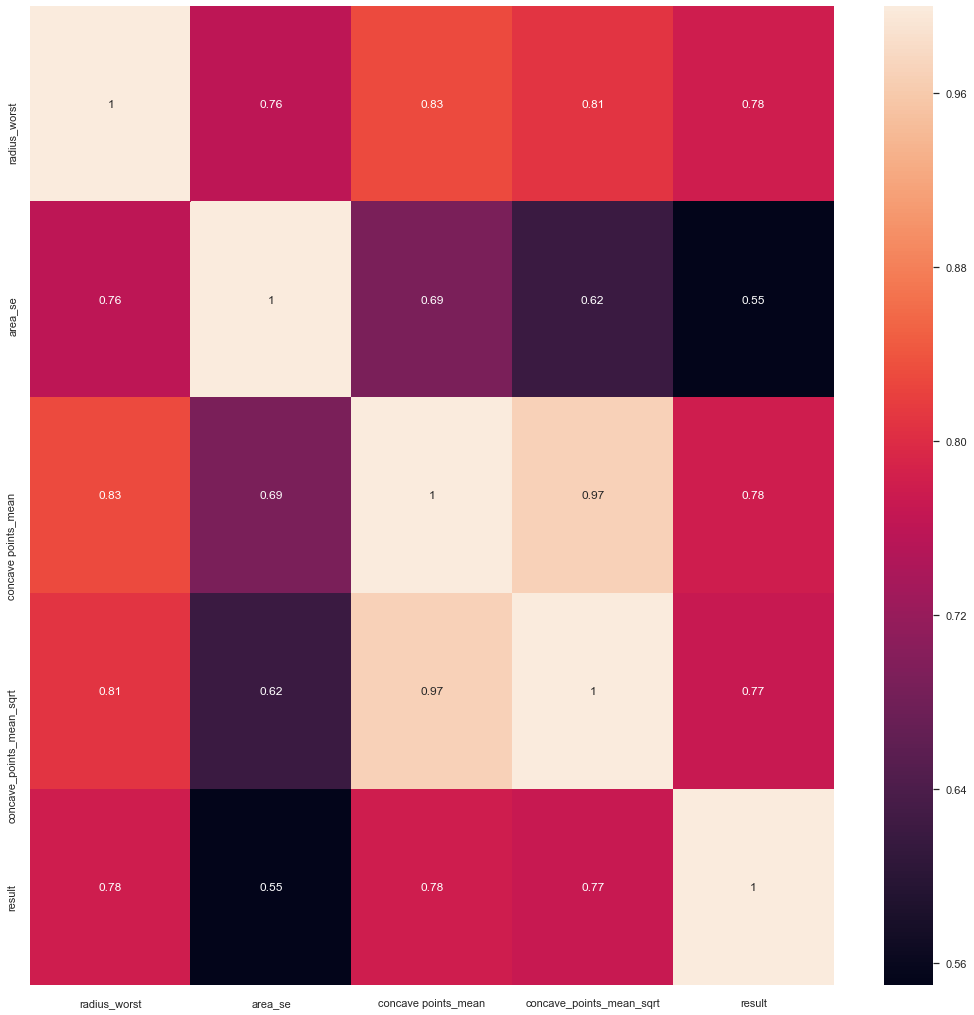

In [181]:
sns.set(rc={'figure.figsize':(18,18)})
correlation_matrix = data[['radius_worst', 'area_se', 'concave points_mean', 'concave_points_mean_sqrt', 'result']].corr(method ='pearson').round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

Пирсон считает, что новая величина даже хуже.

Метод profile_report() при таком обилии данных врядли будет полезен, но все же попробуем его. Хотя бы для того, чтобы продемонстрировать  
знание данного метода.

In [167]:
import pandas_profiling
data.profile_report()

Да, много величин коррелирует между собой, с корреляционными матрицами работать невозможно в силу обилия данных.  
Есть нули в признаке 'concave points_mean', но это было нам известно зарание при использовании мeтода describe() и графическом анализе.  
Для данной величины (предполагаю, что это что-то типа размера продавленного пятна после надавливания), видимо наличие нуля это норма.  
Нули на графиках не кажутся выбросами. Хорошо соответствуют характеру распределения, и относятся только к здоровым пациентам.
Есть целая колонка с NaN, она нас не заботит. Переходим к финишному этапу.

In [182]:
X = data[['radius_worst', 'concave points_mean', 'area_se']]
y = data['result']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

In [184]:
model = LogisticRegression(solver='liblinear').fit(X_train, y_train)
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91        86
           1       0.95      0.74      0.83        57

    accuracy                           0.88       143
   macro avg       0.90      0.86      0.87       143
weighted avg       0.89      0.88      0.88       143



In [185]:
model = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train)
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92        86
           1       0.94      0.79      0.86        57

    accuracy                           0.90       143
   macro avg       0.91      0.88      0.89       143
weighted avg       0.90      0.90      0.89       143



С новыми данными результаты хуже ранее полученных.

Попробуем еще пару идей.

In [187]:
X = data[['concave points_worst', 'symmetry_worst']]
y = data['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

In [188]:
model = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train)
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        86
           1       0.93      0.75      0.83        57

    accuracy                           0.88       143
   macro avg       0.90      0.86      0.87       143
weighted avg       0.89      0.88      0.88       143



In [191]:
X = data[['concave points_worst']]
y = data['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

In [196]:
model = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train)
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        86
           1       0.93      0.75      0.83        57

    accuracy                           0.88       143
   macro avg       0.90      0.86      0.87       143
weighted avg       0.89      0.88      0.88       143



In [198]:
X = data[['perimeter_mean']]
y = data['result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)
model = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train)
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91        86
           1       0.96      0.75      0.84        57

    accuracy                           0.89       143
   macro avg       0.91      0.87      0.88       143
weighted avg       0.90      0.89      0.89       143



Как мы видим наилучшие результаты были нами получены после графического анализа данных. Еще раз попробуем построить эту модель (на чуть-чуть других признаках).

In [224]:
X = data[['radius_mean', 'concave_points_mean_sqrt']]
y = data['result']

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

In [226]:
model = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train)
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        86
           1       0.94      0.86      0.90        57

    accuracy                           0.92       143
   macro avg       0.93      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



Немножко хуже, чем было в модели, построенной после графического анализа, но все равно результаты, лучше у остальных моделей. 

Вернемся полностью к той модели которую строили после графического анализа.

In [237]:
X = data[['radius_mean', 'concave points_worst']]
y = data['result']
X['concave_points_worst_sqrt'] = 0

In [238]:
X['concave_points_worst_sqrt'] = X['concave points_worst']**(1/2)

In [240]:
X.drop(['concave points_worst'], axis='columns', inplace=True)
X.head()

radius_mean  concave_points_worst_sqrt
0        17.99                   0.515170
1        20.57                   0.431277
2        19.69                   0.492950
3        11.42                   0.507445
4        20.29                   0.403113

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 27)

In [242]:
model = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=2, random_state=0).fit(X_train, y_train)
model_pred = model.predict(X_test)
print(classification_report(y_test, model_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        86
           1       0.94      0.89      0.92        57

    accuracy                           0.94       143
   macro avg       0.94      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143



# Вывод

**Построена модель на двух признаках 'radius_mean' и 'concave_points_mean_sqrt', на основе метода дерева решений, дает следующие результаты:** 
- модель позволяет с точностью 94% предсказывать заболевание (т.е. ошибка негативного диагноза 6%)
- модель позволила выявить 89% больных в контрольной выборке
- модель позволяет с точностью 93% предсказывать отсутствие заболевания
- модель позволила выявить 97% здоровых в контрольной выборке

# Спасибо! Было интересно.